In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics


In [7]:
data=pd.read_excel('./fraud_data_lyst1751134022071.xlsx')
data.head()

,trans_date_trans_time,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
0,2019-04-01 00:58:00,"""Stokes, Christiansen and Sipes""",grocery_net,14.37,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,a3806e984cec6ac0096d8184c64ad3a1,65.654142,-164.722603,1
1,2019-04-01 15:06:00,Predovic Inc,shopping_net,966.11,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,a59185fe1b9ccf21323f581d7477573f,65.468863,-165.473127,1
2,2019-04-01 22:37:00,Wisozk and Sons,misc_pos,49.61,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,86ba3a888b42cd3925881fa34177b4e0,65.347667,-165.914542,1
3,2019-04-01 23:06:00,Murray-Smitham,grocery_pos,295.26,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,3a068fe1d856f0ecedbed33e4b5f4496,64.445035,-166.080207,1
4,2019-04-01 23:59:00,Friesen Lt,health_fitness,18.17,Wales,AK,64.7556,-165.6723,145,"""Administrator, education""",1939-09-11 00:00:00,891cdd1191028759dc20dc224347a0ff,65.447094,-165.446843,1


In [8]:
data.shape

(14446, 15)

In [9]:
population_mean=data['amt'].mean()
print(population_mean)


124.43007337671327


# sample mean

In [10]:
sample=data['amt'].sample(n=1000,random_state=42)
print(sample.mean())

119.54582999999998


# Impact of sample size on sample mean


In [11]:
sample_sizes=[40,80,100,300,400,1000,5000,7000]

for i in sample_sizes:
    sample=data['amt'].sample(n=i,random_state=42)
    print(sample.mean())

91.59525
87.425875
81.8355
110.90326666666668
107.9096
119.54582999999998
123.99536800000001
126.52721


# Impact of sample size on sample mean- second method


In [12]:
sample_sizes=[40,80,100,300,400,1000,5000,7000]
sample_means=[data['amt'].sample(n=size,random_state=42).mean() for size in sample_sizes]

for size,mean in zip(sample_sizes,sample_means):
    print(f"sample size: {size}, sample mean: {mean}")
    

sample size: 40, sample mean: 91.59525
sample size: 80, sample mean: 87.425875
sample size: 100, sample mean: 81.8355
sample size: 300, sample mean: 110.90326666666668
sample size: 400, sample mean: 107.9096
sample size: 1000, sample mean: 119.54582999999998
sample size: 5000, sample mean: 123.99536800000001
sample size: 7000, sample mean: 126.52721


# Impact of size on sample mean: as the sample size increses, the sample mean becomes a better estimator of population mean.This is one of key ideas of central limit theorem

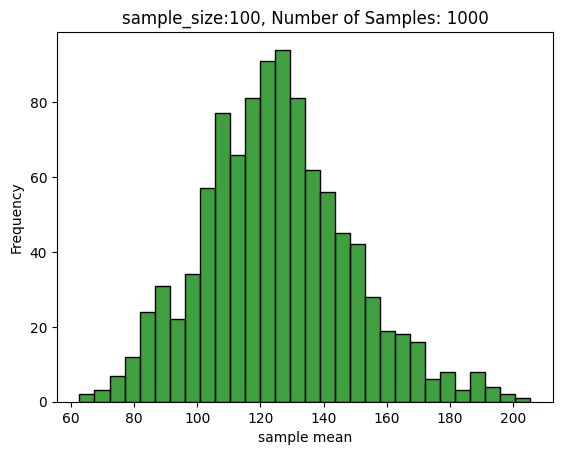

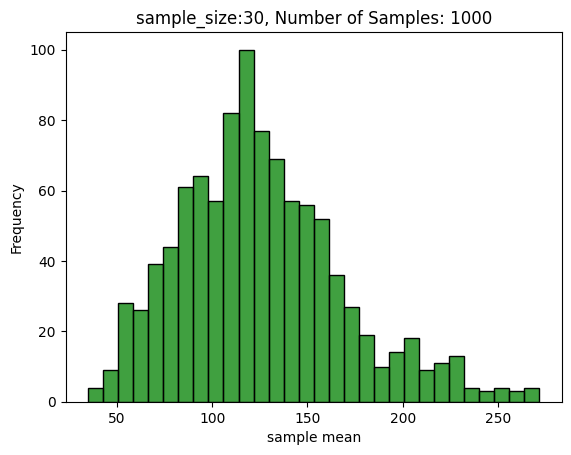

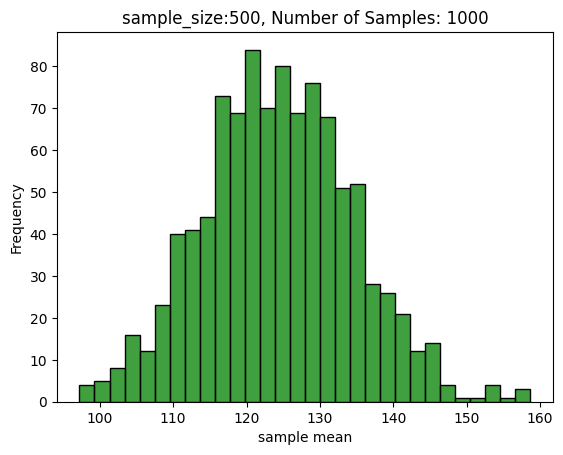

In [13]:
def visualize_clt(data,sample_size,num_samples):
    sample_means=[np.mean(np.random.choice(data,size=sample_size)) for _ in range(num_samples)]
    sns.histplot(sample_means,bins=30,edgecolor='black',color='green')
    plt.title(f'sample_size:{sample_size}, Number of Samples: {num_samples}')
    plt.xlabel('sample mean')
    plt.ylabel('Frequency')
    plt.show()


#function call
visualize_clt(data['amt'],sample_size=100,num_samples=1000)
visualize_clt(data['amt'],sample_size=30,num_samples=1000)
visualize_clt(data['amt'],sample_size=500,num_samples=1000)
    

# Difference between sample mean vs sample distribution mean

## Sample Mean:  the mean of a single sample
## Sample Distribution Mean: the mean of all possible sample mean which approximates to the population mean

In [24]:
sample_means_distribution=[np.mean(np.random.choice(data['amt'],size=100)) for _ in range(1000)]
sample_means_distribution


[np.float64(100.36929999999998),
 np.float64(125.50829999999998),
 np.float64(141.09990000000002),
 np.float64(131.4394),
 np.float64(103.85699999999997),
 np.float64(127.58319999999998),
 np.float64(95.85770000000001),
 np.float64(91.31450000000002),
 np.float64(112.75269999999999),
 np.float64(120.9743),
 np.float64(128.5338),
 np.float64(130.8981),
 np.float64(148.8469),
 np.float64(133.44889999999998),
 np.float64(165.4135),
 np.float64(151.55370000000002),
 np.float64(129.26469999999998),
 np.float64(159.6297),
 np.float64(89.55089999999997),
 np.float64(138.95600000000002),
 np.float64(88.41309999999997),
 np.float64(133.37559999999996),
 np.float64(118.23899999999999),
 np.float64(119.5916),
 np.float64(110.6471),
 np.float64(114.2335),
 np.float64(133.31080000000003),
 np.float64(80.9783),
 np.float64(193.1347),
 np.float64(131.8878),
 np.float64(103.5289),
 np.float64(173.8901),
 np.float64(72.1137),
 np.float64(101.2059),
 np.float64(103.03190000000001),
 np.float64(119.49139

In [19]:
sample_means_distribution_mean=np.mean(sample_means_distribution)
print(sample_means_distribution_mean)

123.76411069999999


In [20]:
print(population_mean)

124.43007337671327


In [26]:
population_sd=data['amt'].std()
print(population_sd)

231.35258718833182


In [29]:
sample_sizes=[10,50,100,500,1000]
standard_errors=[population_sd/np.sqrt(sample_size) for sample_size in sample_sizes]
print(standard_errors)

[np.float64(73.16011180878189), np.float64(32.71819664918428), np.float64(23.13525871883318), np.float64(10.346402234471137), np.float64(7.316011180878189)]


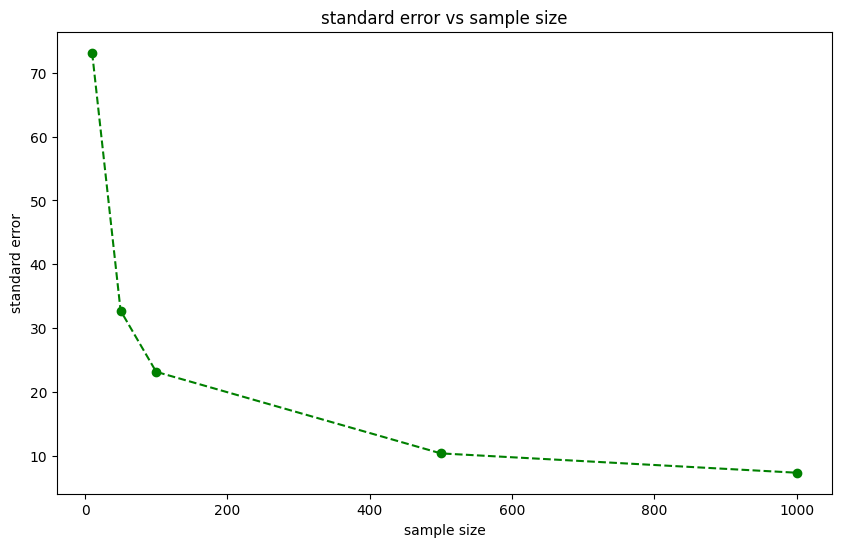

In [34]:
plt.figure(figsize=(10,6))
plt.plot(sample_sizes,standard_errors,marker='o',linestyle='--', color='green')
plt.title('standard error vs sample size')
plt.xlabel('sample size')
plt.ylabel('standard error')
plt.show()
